In [34]:
import numpy as np
merchant_pricing = 1000
platform_subsidy1 = np.array([50, 100, 150, 200])
platform_cut1 = 0.08
merchant_income1 = merchant_pricing - platform_subsidy1 - merchant_pricing * platform_cut1
print(merchant_income1)

platform_subsidy2 = np.array([50, 100, 150, 200])
merchant_subsidy2 = np.array([10, 20, 30, 40])
platform_cut2 = 0.0425
merchant_income2 = merchant_pricing - platform_subsidy2 - merchant_pricing * platform_cut2 - merchant_subsidy2[:, np.newaxis] 

print(merchant_income2)

# Calculate difference between strategies
diff = merchant_income1 - merchant_income2
diff

[870. 820. 770. 720.]
[[897.5 847.5 797.5 747.5]
 [887.5 837.5 787.5 737.5]
 [877.5 827.5 777.5 727.5]
 [867.5 817.5 767.5 717.5]]


array([[-27.5, -27.5, -27.5, -27.5],
       [-17.5, -17.5, -17.5, -17.5],
       [ -7.5,  -7.5,  -7.5,  -7.5],
       [  2.5,   2.5,   2.5,   2.5]])

Intersection Points (Platform Subsidy 2, Merchant Subsidy 2, Income):
[870. 820. 770. 720.]
[[897.5 847.5 797.5 747.5]
 [887.5 837.5 787.5 737.5]
 [877.5 827.5 777.5 727.5]
 [867.5 817.5 767.5 717.5]]
Intersection 1: No intersection
Intersection 2: No intersection
Intersection 3: No intersection
Intersection 4: No intersection


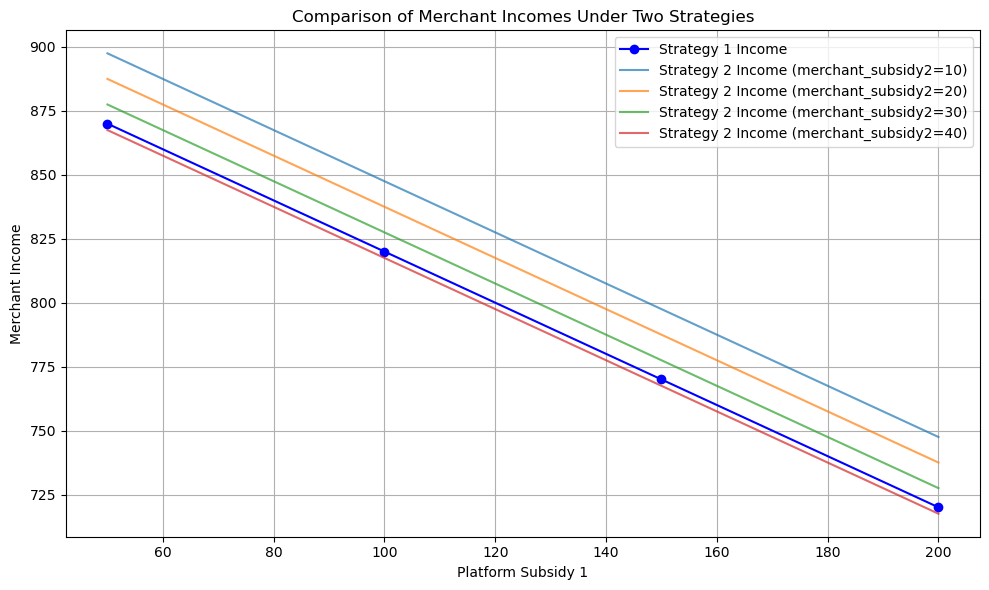

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_merchant_income(merchant_pricing, platform_subsidy1, platform_subsidy2, merchant_subsidy2):
    """
    计算商户在策略1和策略2下的收入。

    参数:
        merchant_pricing (float): 商户定价
        platform_subsidy1 (np.ndarray): 策略1的平台补贴数组
        platform_subsidy2 (np.ndarray): 策略2的平台补贴数组
        merchant_subsidy2 (np.ndarray): 策略2的商户补贴数组

    返回:
        merchant_income1 (np.ndarray): 策略1下的商户收入
        merchant_income2 (np.ndarray): 策略2下的商户收入二维数组
    """
    # 平台策略1计算
    platform_cut1 = 0.08
    merchant_income1 = merchant_pricing - platform_subsidy1 - merchant_pricing*platform_cut1

    # 平台策略2计算
    platform_cut2 = 0.0425
    merchant_income2 = merchant_pricing - platform_subsidy2 - merchant_pricing*platform_cut2 - merchant_subsidy2[:, np.newaxis]

    return merchant_income1, merchant_income2

def find_intersection_points(merchant_income1, merchant_income2):
    """
    计算策略1和策略2下商户收入的交点。

    参数:
        merchant_income1 (np.ndarray): 策略1下的商户收入一维数组
        merchant_income2 (np.ndarray): 策略2下的商户收入二维数组

    返回:
        intersection_points (list of tuples): 每种补贴组合下的交点列表，每个交点为 (platform_subsidy2, merchant_subsidy2, income)
    """
    intersection_points = []
    num_subsidy2 = merchant_income2.shape[0]
    
    for idx in range(num_subsidy2):
        diff = merchant_income1 - merchant_income2[idx]
        
        # 寻找符号变化的位置
        sign_change_idx = np.where(np.diff(np.sign(diff)))[0]
        
        if len(sign_change_idx) > 0:
            # 取第一个符号变化的位置
            change_idx = sign_change_idx[0]
            x0, x1 = platform_subsidy2[change_idx], platform_subsidy2[change_idx + 1]
            y0, y1 = diff[change_idx], diff[change_idx + 1]
            
            # 线性插值计算交点的 platform_subsidy2
            pricing_intersection = x0 + (0 - y0) * (x1 - x0) / (y1 - y0)
            
            # 计算对应的商户收入
            y_income0 = merchant_income1 - merchant_income2[idx, change_idx]
            y_income1 = merchant_income1 - merchant_income2[idx, change_idx + 1]
            income_intersection = y_income0 + (0 - y_income0) * (pricing_intersection - x0) / (x1 - x0)
            
            intersection_points.append((pricing_intersection, merchant_subsidy2[idx], income_intersection))
        else:
            intersection_points.append(None)
    
    return intersection_points

def plot_comparison(merchant_pricing, platform_subsidy1, platform_subsidy2, merchant_subsidy2, merchant_income1, merchant_income2, intersection_points):
    """
    Plot the comparison of merchant incomes between Strategy 1 and Strategy 2 on the same graph.
    
    Parameters:
        merchant_pricing (float): The merchant pricing value (not used directly in plotting).
        platform_subsidy1 (np.ndarray): Array of platform subsidies for Strategy 1.
        merchant_income1 (np.ndarray): Merchant incomes under Strategy 1.
        merchant_income2 (np.ndarray): Merchant incomes under Strategy 2.
        intersection_points (list of tuples): List of intersection points [(x1, y1), (x2, y2), ...].
    """
    plt.figure(figsize=(10, 6))
    
    # Plot Strategy 1
    plt.plot(platform_subsidy1, merchant_income1, label='Strategy 1 Income', color='blue', marker='o')
    
    # Plot each configuration of Strategy 2
    for idx, income in enumerate(merchant_income2):
        plt.plot(platform_subsidy1, income, label=f'Strategy 2 Income (merchant_subsidy2={merchant_subsidy2[idx]})', alpha=0.7)
    
    
    # # Mark intersection points
    # if intersection_points:
    #     x_intersection = [point[0] for point in intersection_points]
    #     y_intersection = [point[1] for point in intersection_points]
    #     plt.scatter(x_intersection, y_intersection, color='green', zorder=5, label='Intersection Points')
    #     for idx, point in enumerate(intersection_points):
    #         plt.text(point[0] + 1, point[1] + 10, f'Point {idx+1}', fontsize=9, color='green')
    
    # Add titles and labels
    plt.title('Comparison of Merchant Incomes Under Two Strategies')
    plt.xlabel('Platform Subsidy 1')
    plt.ylabel('Merchant Income')
    
    # Add legend
    plt.legend()
    
    # Add grid for better readability
    plt.grid(True)
    
    # Show plot
    plt.tight_layout()
    plt.show()



# Example usage
if __name__ == "__main__":
    # Define parameters
    merchant_pricing = 1000  # Merchant pricing
    platform_subsidy1 = np.array([50, 100, 150, 200])  # Platform subsidy for Strategy 1
    platform_subsidy2 = np.array([50, 100, 150, 200])  # Platform subsidies for Strategy 2
    merchant_subsidy2 = np.array([10, 20, 30, 40])     # Merchant subsidies for Strategy 2

    # Calculate incomes and intersections
    merchant_income1, merchant_income2 = calculate_merchant_income(
        merchant_pricing, platform_subsidy1, platform_subsidy2, merchant_subsidy2
    )
    
    # Print intersection points
    print("Intersection Points (Platform Subsidy 2, Merchant Subsidy 2, Income):")
    print(merchant_income1)
    print(merchant_income2)
    intersection_points = find_intersection_points(merchant_income1, merchant_income2)
    for idx, point in enumerate(intersection_points):
        if point is not None:
            print(f"Intersection {idx+1}: {point}")
        else:
            print(f"Intersection {idx+1}: No intersection")

    # Plot the comparison
    plot_comparison(merchant_pricing, platform_subsidy1, platform_subsidy2, merchant_subsidy2, merchant_income1, merchant_income2, intersection_points)